#### Named Entity Recognition

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [ ]:
from google.colab  import files
uploaded = files.upload()

Saving amazon.csv to amazon (8).csv


In [ ]:
import pandas as pd
import io
  
amazon= pd.read_csv(io.BytesIO(uploaded["amazon.csv"]))

In [ ]:
amazon


,X\t
0,Never expected to write a negative review for...
1,Screen Flickering is the most common problem\t
2,Half of the times TV doesn't start with a sing...
3,Booting takes atleast 20 seconds\t
4,Screen goes all the ways blank in middle of pl...
...,...
967,About the software there are a few misses here...
968,ScreenCast lags a lot I'm waiting for an updat...
969,To people who think that the TV lags a lot thi...
970,It's a value for money for those who don't wan...


In [ ]:
amazon = amazon.rename(columns = { 'X\t': 'X'}, inplace = False)

In [ ]:
amazon

,X
0,Never expected to write a negative review for...
1,Screen Flickering is the most common problem\t
2,Half of the times TV doesn't start with a sing...
3,Booting takes atleast 20 seconds\t
4,Screen goes all the ways blank in middle of pl...
...,...
967,About the software there are a few misses here...
968,ScreenCast lags a lot I'm waiting for an updat...
969,To people who think that the TV lags a lot thi...
970,It's a value for money for those who don't wan...


In [ ]:
amazon = [X.strip() for X in amazon.X] # remove both the leading and the trailing characters
amazon = [X for X in amazon if X] # removes empty strings, because they are considered in Python as False
amazon[0:1]

['Never expected to write a negative review for OnePlus Product !']

In [ ]:
amazon

['Never expected to write a negative review for OnePlus Product !',
 'Screen Flickering is the most common problem',
 "Half of the times TV doesn't start with a single button press.",
 'Booting takes atleast 20 seconds',
 'Screen goes all the ways blank in middle of play time.',
 'Audio is dud - Not sufficient for my 10X10 ft bedroom',
 "System lag is the maximum in this class of TV's",
 'Edit: 23/07/2020',
 'Amazon declined to replace and offered refund of 19600/- as against 23k which I paid for the TV. All I have to do now is to live with a defective TV as I had invested in the wallmount and the allied services. OnePlus Settled',
 'Edit: 27/07/2020',
 'Product is back in stock. Amazon accepted for replacement after technician report. But defective product is yet to be picked up and the replacement is yet to be shipped. Awaiting further details. Brand is not at all acting in the',
 'customers interest. Very bad response for OnePlus.',
 'Edit: 6/8/2020',
 'Received the replacement TV f

In [ ]:
# Joining the list into one string/text
text = ' '.join(amazon)
text

'Never expected to write a negative review for OnePlus Product ! Screen Flickering is the most common problem Half of the times TV doesn\'t start with a single button press. Booting takes atleast 20 seconds Screen goes all the ways blank in middle of play time. Audio is dud - Not sufficient for my 10X10 ft bedroom System lag is the maximum in this class of TV\'s Edit: 23/07/2020 Amazon declined to replace and offered refund of 19600/- as against 23k which I paid for the TV. All I have to do now is to live with a defective TV as I had invested in the wallmount and the allied services. OnePlus Settled Edit: 27/07/2020 Product is back in stock. Amazon accepted for replacement after technician report. But defective product is yet to be picked up and the replacement is yet to be shipped. Awaiting further details. Brand is not at all acting in the customers interest. Very bad response for OnePlus. Edit: 6/8/2020 Received the replacement TV from Amazon and the TV if working fine as of now. I 

In [ ]:
#Punctuation
no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'Never expected to write a negative review for OnePlus Product  Screen Flickering is the most common problem Half of the times TV doesnt start with a single button press Booting takes atleast 20 seconds Screen goes all the ways blank in middle of play time Audio is dud  Not sufficient for my 10X10 ft bedroom System lag is the maximum in this class of TVs Edit 23072020 Amazon declined to replace and offered refund of 19600 as against 23k which I paid for the TV All I have to do now is to live with a defective TV as I had invested in the wallmount and the allied services OnePlus Settled Edit 27072020 Product is back in stock Amazon accepted for replacement after technician report But defective product is yet to be picked up and the replacement is yet to be shipped Awaiting further details Brand is not at all acting in the customers interest Very bad response for OnePlus Edit 682020 Received the replacement TV from Amazon and the TV if working fine as of now I installed it on the wall by 

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['Never', 'expected', 'to', 'write', 'a', 'negative', 'review', 'for', 'OnePlus', 'Product', 'Screen', 'Flickering', 'is', 'the', 'most', 'common', 'problem', 'Half', 'of', 'the', 'times', 'TV', 'doesnt', 'start', 'with', 'a', 'single', 'button', 'press', 'Booting', 'takes', 'atleast', '20', 'seconds', 'Screen', 'goes', 'all', 'the', 'ways', 'blank', 'in', 'middle', 'of', 'play', 'time', 'Audio', 'is', 'dud', 'Not', 'sufficient']


In [ ]:
len(text_tokens)

10673

In [ ]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['Never', 'expected', 'write', 'negative', 'review', 'OnePlus', 'Product', 'Screen', 'Flickering', 'common', 'problem', 'Half', 'times', 'TV', 'doesnt', 'start', 'single', 'button', 'press', 'Booting', 'takes', 'atleast', '20', 'seconds', 'Screen', 'goes', 'ways', 'blank', 'middle', 'play', 'time', 'Audio', 'dud', 'Not', 'sufficient', '10X10', 'ft', 'bedroom', 'System', 'lag']


In [ ]:
#Noramalize the data
lower_words = [X.lower() for X in no_stop_tokens]
print(lower_words[0:25])

['never', 'expected', 'write', 'negative', 'review', 'oneplus', 'product', 'screen', 'flickering', 'common', 'problem', 'half', 'times', 'tv', 'doesnt', 'start', 'single', 'button', 'press', 'booting', 'takes', 'atleast', '20', 'seconds', 'screen']


In [ ]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['never', 'expect', 'write', 'neg', 'review', 'oneplu', 'product', 'screen', 'flicker', 'common', 'problem', 'half', 'time', 'tv', 'doesnt', 'start', 'singl', 'button', 'press', 'boot', 'take', 'atleast', '20', 'second', 'screen', 'goe', 'way', 'blank', 'middl', 'play', 'time', 'audio', 'dud', 'not', 'suffici', '10x10', 'ft', 'bedroom', 'system', 'lag']


#!python -m spacy download en

In [ ]:
# NLP english language model of spacy library
nlp = spacy.load('en')

In [ ]:
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:900])

Never expected write negative review OnePlus Product Screen Flickering common problem Half times TV doesnt start single button press Booting takes atleast 20 seconds Screen goes ways blank middle play time Audio dud Not sufficient 10X10 ft bedroom System lag maximum class TVs Edit 23072020 Amazon declined replace offered refund 19600 23k I paid TV All I live defective TV I invested wallmount allied services OnePlus Settled Edit 27072020 Product back stock Amazon accepted replacement technician report But defective product yet picked replacement yet shipped Awaiting details Brand acting customers interest Very bad response OnePlus Edit 682020 Received replacement TV Amazon TV working fine I installed wall A bit lag sound issues screen stuttering gone Problems OnePlus Tv 32Y1observed hours use Pros 1 Picture quality undoubtedly good 2Sound fine enough closed room Cons 1 Lags much 2 Some times restarts automatically 3 While watching YouTube screen sound disappears 2 3 secs 4power also tri

In [ ]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:900])

['never', 'expect', 'write', 'negative', 'review', 'OnePlus', 'Product', 'Screen', 'flicker', 'common', 'problem', 'half', 'time', 'tv', 'do', 'not', 'start', 'single', 'button', 'press', 'Booting', 'take', 'atleast', '20', 'second', 'Screen', 'go', 'way', 'blank', 'middle', 'play', 'time', 'Audio', 'dud', 'not', 'sufficient', '10x10', 'ft', 'bedroom', 'System', 'lag', 'maximum', 'class', 'tv', 'Edit', '23072020', 'Amazon', 'decline', 'replace', 'offer', 'refund', '19600', '23k', '-PRON-', 'pay', 'tv', 'all', '-PRON-', 'live', 'defective', 'tv', '-PRON-', 'invest', 'wallmount', 'ally', 'service', 'OnePlus', 'settle', 'Edit', '27072020', 'product', 'back', 'stock', 'Amazon', 'accept', 'replacement', 'technician', 'report', 'but', 'defective', 'product', 'yet', 'pick', 'replacement', 'yet', 'ship', 'Awaiting', 'detail', 'brand', 'act', 'customer', 'interest', 'very', 'bad', 'response', 'OnePlus', 'Edit', '682020', 'receive', 'replacement', 'tv', 'Amazon', 'TV', 'work', 'fine', '-PRON-', 

Feature Extraction


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [ ]:
print(vectorizer.vocabulary_)

{'never': 856, 'expect': 542, 'write': 1422, 'negative': 851, 'review': 1101, 'oneplus': 890, 'product': 995, 'screen': 1132, 'flicker': 580, 'common': 369, 'problem': 989, 'half': 633, 'time': 1293, 'tv': 1313, 'do': 482, 'not': 868, 'start': 1215, 'single': 1181, 'button': 310, 'press': 979, 'booting': 289, 'take': 1258, 'atleast': 228, '20': 44, 'second': 1138, 'go': 618, 'way': 1389, 'blank': 277, 'middle': 818, 'play': 956, 'audio': 233, 'dud': 493, 'sufficient': 1238, '10x10': 13, 'ft': 600, 'bedroom': 263, 'system': 1257, 'lag': 741, 'maximum': 807, 'class': 352, 'edit': 504, '23072020': 59, 'amazon': 194, 'decline': 439, 'replace': 1069, 'offer': 877, 'refund': 1052, '19600': 37, '23k': 60, 'pron': 1004, 'pay': 932, 'all': 183, 'live': 776, 'defective': 442, 'invest': 709, 'wallmount': 1381, 'ally': 185, 'service': 1154, 'settle': 1158, '27072020': 67, 'back': 249, 'stock': 1219, 'accept': 145, 'replacement': 1070, 'technician': 1269, 'report': 1072, 'but': 309, 'yet': 1432, 'p

In [ ]:
print(vectorizer.get_feature_names()[50:100])
print(X.toarray()[50:100])

['20th', '21', '215pm', '22', '2249', '22999', '22nd', '22oct20', '23', '23072020', '23k', '23oct20', '24', '24hrs', '25', '2607', '27', '27072020', '29', '2k', '2motion', '2nd', '2remote', '2sound', '2those', '30', '3045rs', '306', '31', '310', '31oct20', '32', '32inch', '32inches', '32y1', '32y1observed', '34', '35', '3505mins', '36', '360', '361', '3days', '3k', '3rd', '3those', '3w', '3with', '40', '400']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
print(X.toarray().shape)

(7194, 1436)


#### Let's see how can bigrams and trigrams can be included here

In [ ]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(amazon)

In [ ]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['10', '20', '2020', '32', '32 inchesverified', '32 inchesverified purchase', '43', 'abuse', 'after', 'all', 'amazon', 'and', 'app', 'are', 'as', 'at', 'be', 'but', 'by', 'can', 'connect', 'customer', 'even', 'for', 'found', 'found this', 'found this helpful', 'from', 'good', 'have', 'helpful', 'if', 'in', 'in india', 'in india on', 'inchesverified', 'inchesverified purchase', 'india', 'india on', 'installation', 'is', 'is not', 'issue', 'it', 'july', 'july 2020', 'me', 'my', 'name', 'name 32', 'name 32 inchesverified', 'name 43 inchesverified', 'no', 'not', 'of', 'of stars', 'on', 'one', 'oneplus', 'out', 'out of', 'out of stars', 'people', 'people found', 'people found this', 'picture', 'picture quality', 'product', 'purchase', 'quality', 'quality is', 'remote', 'report', 'report abuse', 'reviewed', 'reviewed in', 'reviewed in india', 'service', 'size', 'size name', 'size name 32', 'sound', 'stars', 'support', 'that', 'the', 'the tv', 'they', 'this', 'this helpful', 'time', 'to', 'to

#### TFidf vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(amazon)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['07', '10', '10 days', '11', '14', '15', '17', '19', '20', '20 july', '20 july 2020', '2020', '21', '21 july', '23', '25', '32', '32 inchesverified', '32 inchesverified purchase', '43', '43 inchesverified', '43 inchesverified purchase', '8th', 'able', 'able to', 'about', 'abuse', 'after', 'again', 'alexa', 'all', 'all the', 'also', 'am', 'amazing', 'amazon', 'amazon and', 'amazon call', 'amazon call support', 'amazon customer', 'an', 'and', 'and it', 'and sound', 'and the', 'and you', 'android', 'angle', 'angles', 'any', 'app', 'apps', 'are', 'as', 'as it', 'as of', 'as of now', 'at', 'at all', 'audio', 'august', 'august 2020', 'available', 'awesome', 'back', 'bad', 'be', 'because', 'been', 'before', 'best', 'better', 'bit', 'black', 'bluetooth', 'brand', 'brands', 'budget', 'build', 'but', 'but the', 'button', 'buy', 'by', 'by the', 'call', 'call support', 'called', 'came', 'can', 'care', 'color', 'colors', 'colour', 'complaint', 'connect', 'connect app', 'connect to', 'connected', '

####  Generate wordcloud

In [ ]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

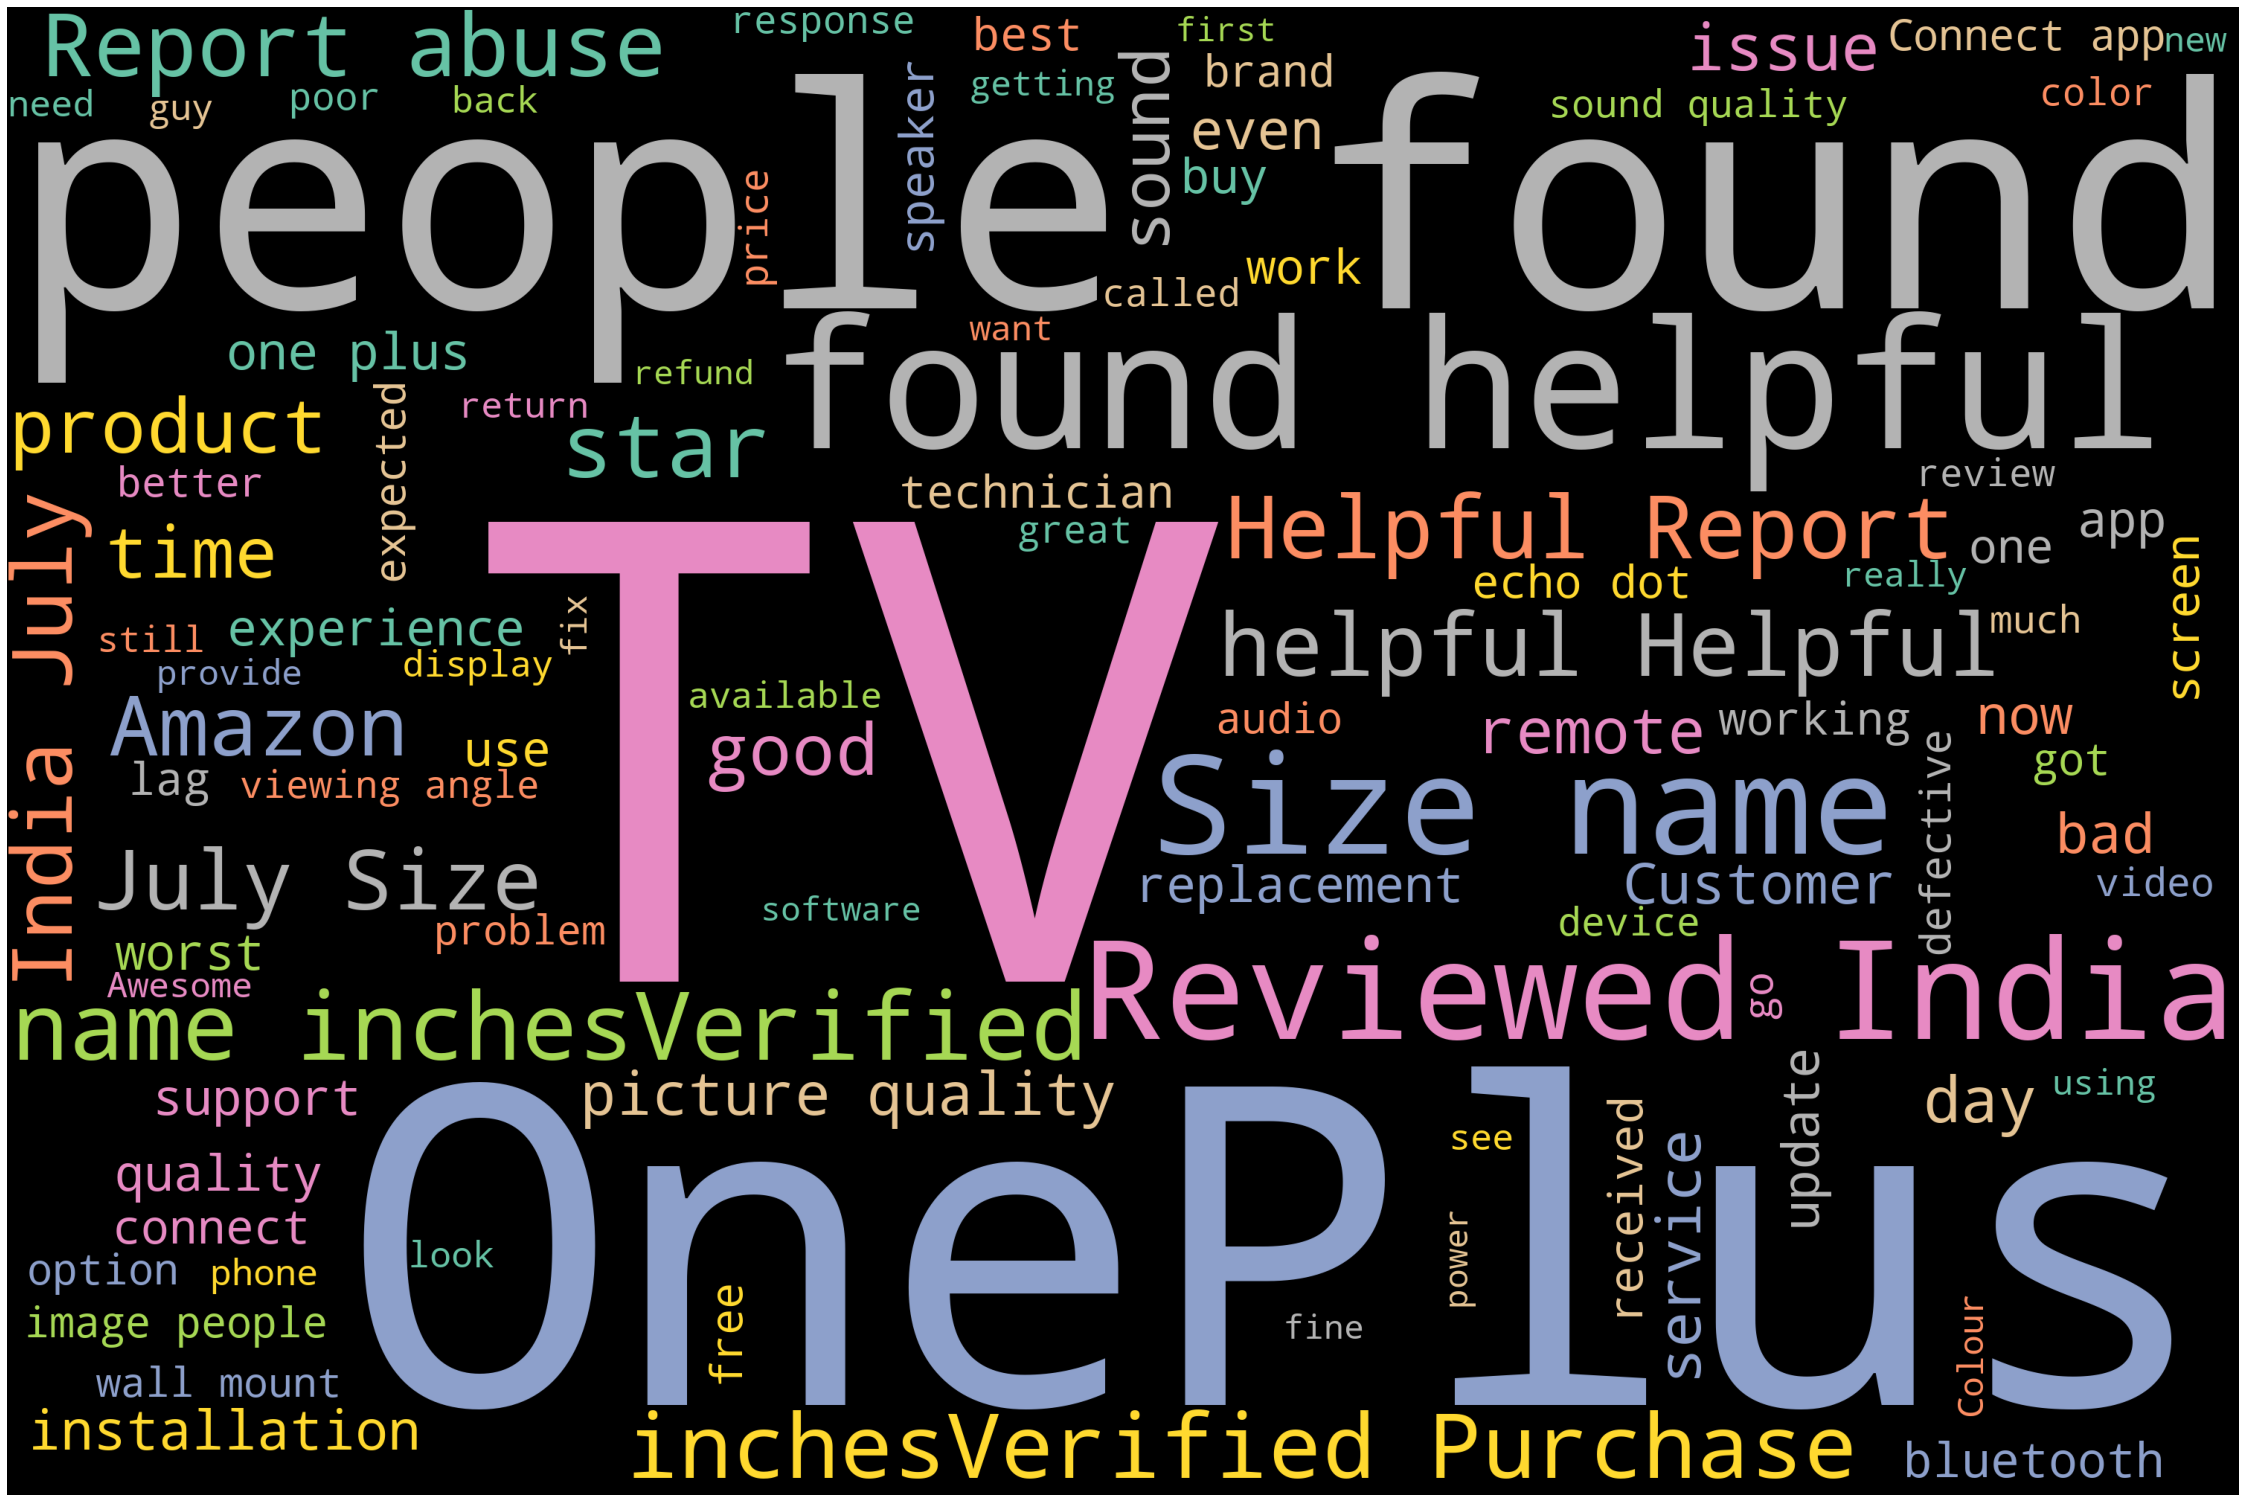

In [ ]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

In [ ]:
amazon

['Never expected to write a negative review for OnePlus Product !',
 'Screen Flickering is the most common problem',
 "Half of the times TV doesn't start with a single button press.",
 'Booting takes atleast 20 seconds',
 'Screen goes all the ways blank in middle of play time.',
 'Audio is dud - Not sufficient for my 10X10 ft bedroom',
 "System lag is the maximum in this class of TV's",
 'Edit: 23/07/2020',
 'Amazon declined to replace and offered refund of 19600/- as against 23k which I paid for the TV. All I have to do now is to live with a defective TV as I had invested in the wallmount and the allied services. OnePlus Settled',
 'Edit: 27/07/2020',
 'Product is back in stock. Amazon accepted for replacement after technician report. But defective product is yet to be picked up and the replacement is yet to be shipped. Awaiting further details. Brand is not at all acting in the',
 'customers interest. Very bad response for OnePlus.',
 'Edit: 6/8/2020',
 'Received the replacement TV f

In [ ]:
##Part Of Speech Tagging
nlp = spacy.load('en')

one_block = amazon[700]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [ ]:
one_block

"not getting connected smart tv without wifi connectivity is as waste as it is. After raising complaint to one plus tv 2 days back yet no one responded. I suggest everyone's go ahead with mi 32 better price best quality as my cousin"

In [ ]:
for token in doc_block[0:4000]:
    print(token, token.pos_)

not PART
getting VERB
connected ADJ
smart ADJ
tv NOUN
without ADP
wifi NOUN
connectivity NOUN
is AUX
as SCONJ
waste NOUN
as SCONJ
it PRON
is AUX
. PUNCT
After ADP
raising VERB
complaint NOUN
to ADP
one NUM
plus CCONJ
tv NOUN
2 NUM
days NOUN
back ADV
yet ADV
no DET
one NOUN
responded VERB
. PUNCT
I PRON
suggest VERB
everyone PRON
's PART
go VERB
ahead ADV
with ADP
mi PROPN
32 NUM
better ADJ
price NOUN
best ADJ
quality NOUN
as SCONJ
my DET
cousin NOUN


In [ ]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[0:2500])

['getting', 'tv', 'wifi', 'connectivity', 'waste', 'raising', 'complaint', 'tv', 'days', 'one', 'responded', 'suggest', 'go', 'price', 'quality', 'cousin']


In [ ]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:1000]

,word,count
0,tv,2
1,getting,1
2,wifi,1
3,connectivity,1
4,waste,1
5,raising,1
6,complaint,1
7,days,1
8,one,1
9,responded,1


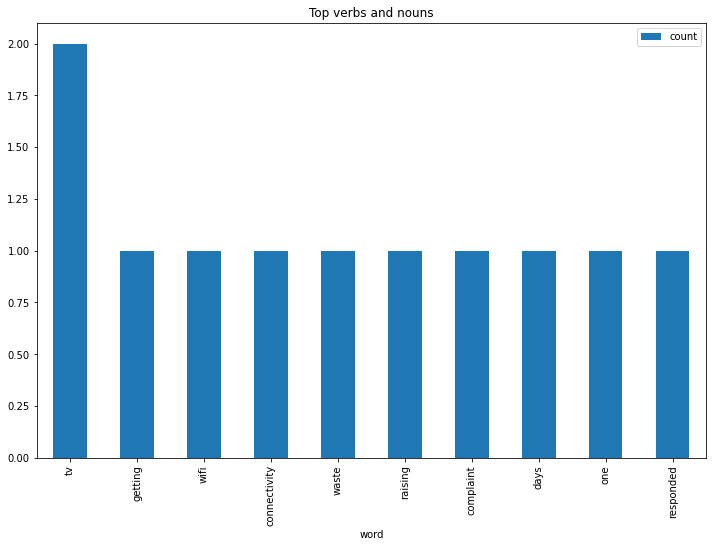

In [ ]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

#### Emotion Mining

In [ ]:
from google.colab  import files
uploaded = files.upload()

Saving Afinn.csv to Afinn.csv


In [ ]:
import io
  #Sentiment analysis

affiny = pd.read_csv(io.BytesIO(uploaded["Afinn.csv"]),sep=',', encoding='latin-1')

In [ ]:

affiny.shape

(2477, 2)

In [ ]:
affiny.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [ ]:
amazon

['Never expected to write a negative review for OnePlus Product !',
 'Screen Flickering is the most common problem',
 "Half of the times TV doesn't start with a single button press.",
 'Booting takes atleast 20 seconds',
 'Screen goes all the ways blank in middle of play time.',
 'Audio is dud - Not sufficient for my 10X10 ft bedroom',
 "System lag is the maximum in this class of TV's",
 'Edit: 23/07/2020',
 'Amazon declined to replace and offered refund of 19600/- as against 23k which I paid for the TV. All I have to do now is to live with a defective TV as I had invested in the wallmount and the allied services. OnePlus Settled',
 'Edit: 27/07/2020',
 'Product is back in stock. Amazon accepted for replacement after technician report. But defective product is yet to be picked up and the replacement is yet to be shipped. Awaiting further details. Brand is not at all acting in the',
 'customers interest. Very bad response for OnePlus.',
 'Edit: 6/8/2020',
 'Received the replacement TV f

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline



In [ ]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(amazon))
sentences[0:500]

['Never expected to write a negative review for OnePlus Product !',
 "Screen Flickering is the most common problem Half of the times TV doesn't start with a single button press.",
 'Booting takes atleast 20 seconds Screen goes all the ways blank in middle of play time.',
 "Audio is dud - Not sufficient for my 10X10 ft bedroom System lag is the maximum in this class of TV's Edit: 23/07/2020 Amazon declined to replace and offered refund of 19600/- as against 23k which I paid for the TV.",
 'All I have to do now is to live with a defective TV as I had invested in the wallmount and the allied services.',
 'OnePlus Settled Edit: 27/07/2020 Product is back in stock.',
 'Amazon accepted for replacement after technician report.',
 'But defective product is yet to be picked up and the replacement is yet to be shipped.',
 'Awaiting further details.',
 'Brand is not at all acting in the customers interest.',
 'Very bad response for OnePlus.',
 'Edit: 6/8/2020 Received the replacement TV from Amaz

In [ ]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,Never expected to write a negative review for ...
1,Screen Flickering is the most common problem H...
2,Booting takes atleast 20 seconds Screen goes a...
3,Audio is dud - Not sufficient for my 10X10 ft ...
4,All I have to do now is to live with a defecti...
...,...
613,About the software there are a few misses here...
614,ScreenCast lags a lot I'm waiting for an updat...
615,To people who think that the TV lags a lot thi...
616,It's a value for money for those who don't wan...


In [ ]:
affinity_scores = affiny.set_index('word')['value'].to_dict()

In [ ]:
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [ ]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [ ]:
# test that it works
calculate_sentiment(text = 'great')

3

In [ ]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [ ]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0    11
1    19
2    16
3    41
4    24
5     9
6     7
7    17
8     3
9    10
Name: word_count, dtype: int64

In [ ]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
264,The external view looks beautiful the TV scree...,6,13
195,May be good for a monitor but not definitely g...,6,13
352,19 people found this helpful Helpful Report ab...,7,108
418,Then called oneplus and they again said amazon...,7,24
535,VA Panels are best for the straight view angle...,7,21
335,17 people found this helpful Helpful Report ab...,8,45
251,I ordered this bcoz I'm a big fan of Oneplus s...,8,26
263,So don't buy one plus Tv Also Tv ratings not g...,8,118
399,1.0 out of 5 stars It's OK at this price with ...,8,87
192,This whole scene was of 10 am to 2:15pm then f...,9,100


In [ ]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    618.000000
mean       0.383495
std        2.265988
min      -15.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        9.000000
Name: sentiment_value, dtype: float64

In [ ]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
0,Never expected to write a negative review for ...,-2,11
1,Screen Flickering is the most common problem H...,-2,19
2,Booting takes atleast 20 seconds Screen goes a...,0,16
3,Audio is dud - Not sufficient for my 10X10 ft ...,-4,41
4,All I have to do now is to live with a defecti...,0,24
...,...,...,...
609,You can always buy a soundbar if you think the...,0,16
610,For me it's more than enough.,0,6
613,About the software there are a few misses here...,-2,22
614,ScreenCast lags a lot I'm waiting for an updat...,-1,14


In [ ]:
sent_df[sent_df['sentiment_value']==-5]

,sentence,sentiment_value,word_count,index
230,48 people found this helpful Helpful Report ab...,-5,33,230
605,Again do a little research before leaving nega...,-5,14,605


In [ ]:
sent_df['index']=range(0,len(sent_df))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


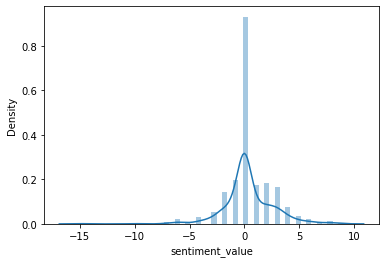

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

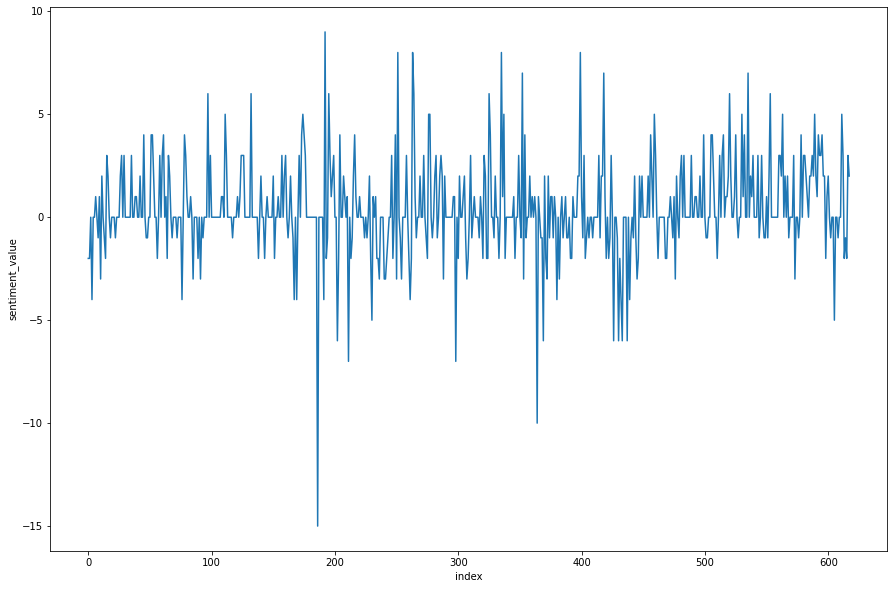

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

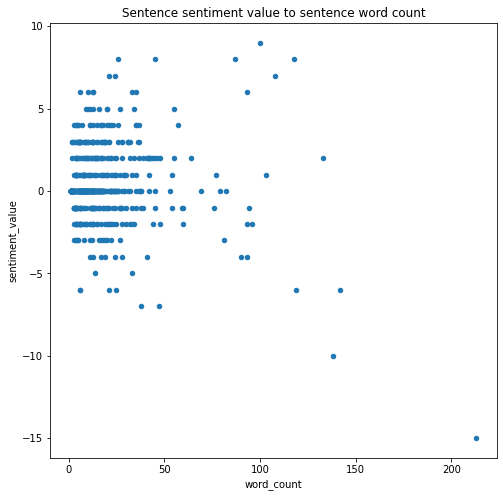

In [ ]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

Inference : Review Sentiment with negative dentiment value helps company to review their product or service
